In [195]:
import pandas as pd
import numpy as np

In [196]:
data = pd.read_csv("iris.csv")
data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa


In [197]:
data_array = np.array(data)
np.random.shuffle(data_array)
data = pd.DataFrame(data_array,columns=list(data.columns))
data.columns

Index(['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm',
       'petal_width_cm', 'class'],
      dtype='object')

Checking if the dataframe has any nan values or not

In [198]:
data.isnull().values.any()

True

As the dataframe has nan values now checking col wise tha which column has nan values and amout of nan values


In [199]:
def fill_nan(col):
    
    mean_val = data[col].mean()
    
    data[col].fillna(value=mean_val,inplace=True)
    
    print("Filled the nan values")

In [200]:
for col in data.columns[:-1]:
    
    check = data[col].isnull().values.any()
    
    amount = data[col].isnull().values.sum()
    
    print(check)
    
    print(amount)
    
    if check :
        
        print('Column does Contains nan values, now  filling the nan values')
        
        fill_nan(col)
        

False
0
False
0
False
0
True
5
Column does Contains nan values, now  filling the nan values
Filled the nan values


as the last feature column gives true it menas it does have nan 5 values so we need to replace these values

In [201]:
data["petal_width_cm"].isnull().values.any()  # see now the last column does not contains any nan values

False

In [202]:
data["petal_width_cm"].mean()

1.236551724137932

In [203]:
data.mean()

sepal_length_cm    5.644627
sepal_width_cm     3.054667
petal_length_cm    3.758667
petal_width_cm     1.236552
dtype: float64

In [204]:
np.mean(data,axis=0)

sepal_length_cm    5.644627
sepal_width_cm     3.054667
petal_length_cm    3.758667
petal_width_cm     1.236552
dtype: float64

In [205]:
data.std()

sepal_length_cm    1.312781
sepal_width_cm     0.433123
petal_length_cm    1.764420
petal_width_cm     0.742281
dtype: float64

In [206]:
data["petal_width_cm"].std()

0.742281427219551

In [207]:
np.std(data,axis=0)

sepal_length_cm    1.308398
sepal_width_cm     0.431677
petal_length_cm    1.758529
petal_width_cm     0.739803
dtype: float64

In [208]:
#converting data into zero mean and 1 stnd deviation
normalized_data = (data.iloc[:,:-1] - data.mean())/data.std()

In [209]:
normalized_data["class"] = data["class"]

In [210]:
normalized_data["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', 'versicolor',
       'Iris-setossa'], dtype=object)

In [211]:
normalized_data["class"].replace(to_replace="Iris-setossa",value="setossa",inplace=True)
normalized_data["class"].replace(to_replace="Iris-versicolor",value='versicolor',inplace=True)
normalized_data["class"].replace(to_replace="Iris-setosa",value='setossa',inplace=True)
normalized_data["class"].replace(to_replace='Iris-virginica',value="virginica",inplace=True)

In [212]:
normalized_data["class"].unique()

array(['setossa', 'versicolor', 'virginica'], dtype=object)

In [213]:
normalized_data["class"].replace(to_replace=['setossa', 'versicolor', 'virginica'],value=[1,2,3],inplace=True)

In [214]:
complete_normalized_data = normalized_data

In [215]:
normalized_data = complete_normalized_data.iloc[:int(0.80*len(complete_normalized_data)),:]

In [216]:
normalized_data_test = complete_normalized_data.iloc[int(0.80*len(complete_normalized_data)):,:]

In [217]:
normalized_data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,-0.643387,0.104666,-1.22344,-1.396440,1
1,-0.414865,1.72084,-1.22344,-1.396440,1
2,-0.033994,-0.818859,0.250129,0.085477,2
3,0.880096,0.335547,1.21362,1.432675,3
4,0.346877,-0.126215,0.476833,0.220197,2
5,0.194528,-0.126215,0.760212,0.759076,3
6,-0.491039,-2.43503,-0.146601,-0.318682,2
7,1.56566,-1.04974,1.78038,1.432675,3
8,0.727747,-0.126215,0.363481,0.220197,2
9,0.803922,0.104666,1.04359,1.567395,3


### Applying the LDA for classification

In [218]:
def mean(normalized_data):
    mean_vectors=[]
    for clas in list(normalized_data["class"].unique()):
        sub_d = normalized_data[normalized_data["class"]== clas]
        mean_vector = np.array(sub_d.iloc[:,:-1].mean())
        mean_vectors.append(mean_vector)
    return mean_vectors

In [220]:
mean_vector  = np.array(normalized_data.mean(axis=0))
mean_vector

array([-0.02070159,  0.0892741 , -0.01624707, -0.03117137,  1.98333333])

In [221]:
mean_vector.shape

(5,)

In [222]:
normalized_data[normalized_data["class"]== 1]

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,-0.643387,0.104666,-1.22344,-1.396440e+00,1
1,-0.414865,1.72084,-1.22344,-1.396440e+00,1
10,-0.338691,1.02819,-1.28012,-1.396440e+00,1
18,-0.795735,0.104666,-1.28012,-1.396440e+00,1
20,-0.567213,0.104666,-1.28012,-1.531160e+00,1
22,-0.491039,1.02819,-1.22344,-8.575612e-01,1
23,-0.414865,1.02819,-1.33679,-1.261721e+00,1
29,-0.186342,0.79731,-1.28012,-1.127001e+00,1
31,-0.643387,0.79731,-1.05341,-1.396440e+00,1
33,-0.491039,0.79731,-1.28012,-2.991380e-16,1


In [223]:
mean_vectors=[]
for clas in list(normalized_data["class"].unique()):
    sub_d = normalized_data[normalized_data["class"]== clas]
    mean_vector = np.array(sub_d.iloc[:,:-1].mean())
    mean_vectors.append(mean_vector)

In [224]:
mean_vectors  # mean vector for evey class

[array([-0.45206603,  0.88858875, -1.29857078, -1.23322088]),
 array([-0.38960028, -0.62645793,  0.28633891,  0.12664177]),
 array([ 0.75561605, -0.12058386,  1.06294376,  1.09094706])]

## Computing the Scatter Matrices

#### Within Class Scatter Matrix

$$S_{w} = \sum\limits_{i=1}^n s_{i}$$
$$ S_{i} = \sum\limits_{i=1}^n  (x-m_{i})(x-m_{i})^{T}$$
$$ m_{i} = \frac{1}{n}\sum\limits_{i=1}^n x_{i}$$

In [225]:
no_feat = len((normalized_data).columns) -1
no_feat

4

In [226]:
y = normalized_data["class"]

In [227]:
X = np.array(normalized_data.iloc[:,:-1])

In [238]:
S_w = np.zeros((no_feat,no_feat),dtype='float')

for cl,mv in zip(range(1,no_feat),mean_vectors):
    
    class_wise_scatter_matrix = np.zeros((no_feat,no_feat))
    

    for row in X[y == cl]:   # class wise data ki single single row will come
        
        #print(row)
        
        row = row.reshape(no_feat,1)  #reshape to make them same dimesnion to do subtraction  (x-m)
        
        mv = mv.reshape(no_feat,1)
        
        class_wise_scatter_matrix = class_wise_scatter_matrix + (row-mv).dot((row-mv).T)  #doing (x-mv)and (x-mv)transpose
        
        #and in formula there is summation  thats why we are adding this class_wise_scatter_matrix = class_wise_scatter_matrix+
        
    S_w = S_w + class_wise_scatter_matrix

print('within-class Scatter Matrix:\n', S_w)
        

within-class Scatter Matrix:
 [[102.4788567751078 22.90425732913036 8.088908468428354 4.844458610707774]
 [22.90425732913036 76.13479447273659 8.034779832855602
  10.565410622131786]
 [8.088908468428354 8.034779832855602 6.4338306890159975
  3.6482620197800673]
 [4.844458610707774 10.565410622131786 3.6482620197800673
  13.649244108082316]]


#### Between Class Scatter Matrix

$$ \sum i = \frac{1}{N_{i}-1}\sum\limits_{i=1}^n (x-m_{i})(x-m_{i})^{T}$$
$$ S_{w} = \sum\limits_{i=1}^c (N-1) \sum i $$
$$ S_{i} = \sum\limits_{i=1}^c N (m_{i}-m)(m_{i}-m)_{T}$$

In [239]:
mean_vectors  #class wise mean vector

[array([-0.45206603,  0.88858875, -1.29857078, -1.23322088]),
 array([-0.38960028, -0.62645793,  0.28633891,  0.12664177]),
 array([ 0.75561605, -0.12058386,  1.06294376,  1.09094706])]

In [240]:
len(mean_vectors)

3

In [241]:
overall_mean = np.mean(X, axis=0)
overall_mean

array([-0.020701593265182238, 0.08927410326743114, -0.016247072603842675,
       -0.031171372724701118], dtype=object)

In [242]:
overall_mean = np.mean(X, axis=0)  # feature wise means

S_b = np.zeros((no_feat,no_feat),dtype='float')

for i,mv in zip(range(1,4),mean_vectors):  #range(1,4) will give 1,2,3 while iterating means they are giving the class

    n = X[y==i,:].shape[0]
    
    mv = mv.reshape(4,1)
    
    overall_mean = overall_mean.reshape(4,1)
    
    S_b =S_b+ n* (mv - overall_mean).dot((mv - overall_mean).T)
    
print("the between class scratter matrix is :",S_b)

the between class scratter matrix is : [[37.60977394034882 -12.00062437070728 54.11654193578737
  55.91654008577828]
 [-12.00062437070728 47.72032721321729 -61.15623100109578
  -55.0362523975378]
 [54.11654193578737 -61.15623100109578 121.7540911661956
  117.6501633968306]
 [55.91654008577828 -55.0362523975378 117.6501633968306 114.6534096787596]]


### Selectig the eigen vectors 
which we will project our data that will give us the max difference between the means and minimum individual variances we will apply svd and that will give us the factorized matrix which contains the matrix of eigrn vectoor from the matrix of eigen vector we will select the top eigen vector to which we will project our data 

In [245]:
S_w = S_w.astype("float")
S_b = S_b.astype("float")

In [246]:
factorized_mat = np.linalg.svd(np.linalg.inv(S_w).dot(S_b))
eigen_vectors = factorized_mat[0]
eigen_vectors

array([[-0.02622394, -0.28431111, -0.95718318,  0.04774792],
       [-0.16683238, -0.29209099,  0.04440553, -0.94067952],
       [ 0.94533738,  0.20326384, -0.09801734, -0.23540103],
       [ 0.27895609, -0.89024371,  0.26873986,  0.2396425 ]])

In [247]:
eigen_vectors.shape

(4, 4)

In [248]:
factorized_mat[1]# eigen values

array([3.38789316e+01, 5.80808623e-01, 4.13238973e-15, 5.02924397e-16])

In [249]:
e_1= factorized_mat[1][0]  # first eigen val
e_2 = factorized_mat[1][1]
e = sum([e_1 ,e_2])

In [250]:
t = sum(factorized_mat[1])  #total sum of eigen values

The first eigenpair is by far the most informative one, and we won’t loose much information if we would form a 1D-feature spaced based on this eigenpair.

In [251]:
e/t  # see the 1st eigen values contains 98% of total variance of data

0.9999999999999998

now we need to project our data to the required dimension which is selected by eigen vectors depending on the eigen values and variance we need to preserve

In [252]:
X.shape

(120, 4)

In [253]:
dimension_needed = 2

In [254]:
req_eig_vector = eigen_vectors[:,:dimension_needed]
req_eig_vector.shape

(4, 2)

In [258]:
type(req_eig_vector)

numpy.ndarray

In [259]:
k=X
k = X.astype("float")

In [261]:
projected_data = np.matmul(k,req_eig_vector)
projected_data

array([[-1.54670088e+00,  1.14684069e+00],
       [-1.82232297e+00,  6.09800785e-01],
       [ 3.97804713e-01,  2.23592755e-01],
       [ 1.46787270e+00, -1.37697681e+00],
       [ 5.24153400e-01, -1.60860921e-01],
       [ 9.46361122e-01, -5.39679662e-01],
       [ 1.91632349e-01,  1.10476343e+00],
       [ 2.21678313e+00, -1.05205964e+00],
       [ 4.07009897e-01, -2.92186993e-01],
       [ 1.38523632e+00, -1.44237520e+00],
       [-1.76234291e+00,  7.78938525e-01],
       [ 1.16134286e+00, -1.14892946e+00],
       [-3.10786492e-02,  8.79408090e-01],
       [ 9.11064868e-01,  4.76435036e-02],
       [ 1.46375508e+00, -1.06720469e+00],
       [ 1.49801731e+00, -2.95104130e-01],
       [ 1.45974372e+00, -1.06871535e+00],
       [ 1.59984681e+00, -6.37199713e-01],
       [-1.59628349e+00,  1.17863485e+00],
       [ 1.13493234e+00, -1.43951131e+00],
       [-1.63985716e+00,  1.23359683e+00],
       [ 7.08590815e-01, -7.09116802e-01],
       [-1.55444633e+00,  3.54039193e-01],
       [-1.

In [262]:
import matplotlib.pyplot as plt

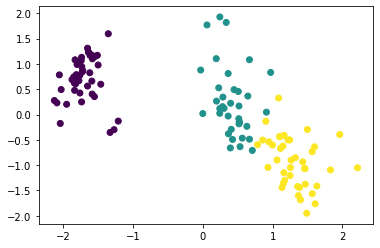

In [263]:
x_1 = projected_data[:,0]
x_2 = projected_data[:,1]
plt.scatter(x_1,x_2,c=y)

### Lda  on testing data using functions

In [275]:
def cal_mean(normalized_data_test,X,y):
    mean_vectors=[]
    for clas in list(y.unique()):
        sub_d = normalized_data_test[normalized_data_test["class"]== clas]
        mean_vector = np.array(sub_d.iloc[:,:-1].mean())
        mean_vectors.append(mean_vector)
    return mean_vectors

In [276]:
def cal_scatter_mat(X,mean_vectors,no_feat):
    
    S_w = np.zeros((no_feat,no_feat))

    for cl,mv in zip(range(1,no_feat),mean_vectors):

        class_wise_scatter_matrix = np.zeros((no_feat,no_feat))


        for row in X[y == cl]:   # class wise data ki single single row will come

            #print(row)

            row = row.reshape(no_feat,1)  #reshape to make them same dimesnion to do subtraction  (x-m)

            mv = mv.reshape(no_feat,1)

            class_wise_scatter_matrix = class_wise_scatter_matrix + (row-mv).dot((row-mv).T)  #doing (x-mv)and (x-mv)transpose

            #and in formula there is summation  thats why we are adding this class_wise_scatter_matrix = class_wise_scatter_matrix+

        S_w = S_w + class_wise_scatter_matrix

    
    ## between class scatter matrix
    
    overall_mean = np.mean(X, axis=0)  # feature wise means

    S_b = np.zeros((no_feat,no_feat))

    for i,mv in zip(range(1,4),mean_vectors):  #range(1,4) will give 1,2,3 while iterating means they are giving the class

        n = X[y==i,:].shape[0]

        mv = mv.reshape(4,1)

        overall_mean = overall_mean.reshape(4,1)

        S_b = S_b +n* (mv - overall_mean).dot((mv - overall_mean).T)
    
    return S_w,S_b

In [277]:
def transformed_mat(S_w,S_b,dimension_needed,X_converted):
    
    factorized_mat = np.linalg.svd(np.linalg.inv(S_w).dot(S_b))
    
    eigen_vectors = factorized_mat[0]
    
    req_eig_vector = eigen_vectors[:,:dimension_needed]
    
    projected_data = np.matmul(X_converted,req_eig_vector)
    
    return projected_data

In [278]:
def plot(projected_data,y):
    
    x_1 = projected_data[:,0]
    
    x_2 = projected_data[:,1]
    
    plt.scatter(x_1,x_2,c=y)

In [281]:
def lda(normalized_data_test,X,y,no_feat):
     
    mean_vectors = cal_mean(normalized_data_test,X,y)
    
    print(mean_vectors)
    
    S_w,S_b = cal_scatter_mat(X,mean_vectors,no_feat)
    
    print('within-class Scatter Matrix:\n', S_w)
    
    print("the between class scratter matrix is :",S_b)
    
    dimension_needed = 2  # feature needed 
    
    S_w = S_w.astype("float")
    
    S_b = S_b.astype("float")
    
    X_converted = X.astype("float")
    
    projected_data = transformed_mat(S_w,S_b,dimension_needed,X_converted)
    
    plot(projected_data,y)

testing above functions on training data

[array([ 0.21085148, -0.71990989,  0.27846727,  0.10472307]), array([ 0.37226812, -0.4853638 ,  0.80429307,  0.9985782 ]), array([-0.54544895,  0.53344575, -1.31250438, -0.95896601])]
within-class Scatter Matrix:
 [[16.8562204642802 -9.566445235294628 29.194148235577032 25.1919865533404]
 [-9.566445235294628 33.92878298354813 -29.6743060553707
  -21.818318572163847]
 [29.194148235577032 -29.6743060553707 63.73084255856999
  56.66793724400927]
 [25.1919865533404 -21.818318572163847 56.66793724400927
  58.60900764555229]]
the between class scratter matrix is : [[4.840145057523192 -5.880385164627015 10.97610481949237
  9.650814961283395]
 [-5.880385164627015 8.289358742486789 -12.910210756885178
  -10.20392485524755]
 [10.97610481949237 -12.910210756885178 25.048389090001162
  22.44968988063588]
 [9.650814961283395 -10.20392485524755 22.44968988063588
  21.263133315990785]]


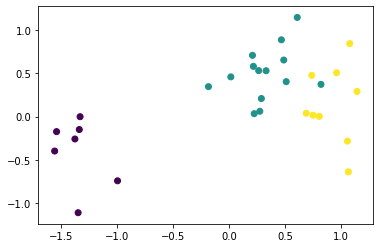

In [282]:
X = np.array(normalized_data_test.iloc[:,:-1])
y = normalized_data_test["class"]  # lablel of training data
no_feat = len((normalized_data).columns) -1
lda(normalized_data_test,X,y,no_feat)